In [1]:
!pip install datasets
!pip install numpy==1.21
!pip install diffusers
!pip install -r requirements.txt
!pip install wandb
!apt install git-lfs
!git lfs install

  Using cached datasets-2.12.0-py3-none-any.whl (474 kB)
  Using cached huggingface_hub-0.14.1-py3-none-any.whl (224 kB)
  Using cached fsspec-2023.5.0-py3-none-any.whl (160 kB)
  Using cached pandas-2.0.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.3 MB)
  Using cached pyarrow-12.0.0-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (39.0 MB)
  Using cached responses-0.18.0-py3-none-any.whl (38 kB)
  Using cached aiohttp-3.8.4-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.0 MB)
  Using cached xxhash-3.2.0-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (213 kB)
  Using cached multiprocess-0.70.14-py38-none-any.whl (132 kB)
  Using cached async_timeout-4.0.2-py3-none-any.whl (5.8 kB)
  Using cached frozenlist-1.3.3-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (161 kB)
  Using cached yarl-1.9.2-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (266 kB)
  Using cached multidict-6.0.4-

In [38]:
from diffusers import DiffusionPipeline

repo_id = "runwayml/stable-diffusion-v1-5"
pipeline = DiffusionPipeline.from_pretrained(repo_id)
print(pipeline)

pipeline.tokenizer

tok = CLIPTokenizer(
    name_or_path="/root/.cache/huggingface/hub/models--runwayml--stable-diffusion-v1-5/snapshots/39593d5650112b4cc580433f6b0435385882d819/tokenizer",
    vocab_size=49408,
    model_max_length=77,
    is_fast=False,
    padding_side="right",
    truncation_side="right",
)

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.16.1",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}



TypeError: __init__() missing 2 required positional arguments: 'vocab_file' and 'merges_file'

In [32]:
from transformers import ViTFeatureExtractor, ViTModel
from PIL import Image
import requests

url = 'http://images.cocodataset.org/val2017/000000039769.jpg'
image = Image.open(requests.get(url, stream=True).raw)

feature_extractor = ViTFeatureExtractor.from_pretrained('facebook/dino-vitb16')

model = ViTModel.from_pretrained('facebook/dino-vitb16')

inputs = feature_extractor(images=image, return_tensors="pt")

outputs = model(**inputs)

last_hidden_states = outputs.last_hidden_state

/usr/local/lib/python3.8/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


Some weights of ViTModel were not initialized from the model checkpoint at facebook/dino-vitb16 and are newly initialized: ['pooler.dense.weight', 'pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [34]:
last_hidden_states.shape
/root/notebooks/nfs/work/barry.chen/diffusers/src/diffusers/models/unet_2d_condition.py

torch.Size([1, 197, 768])

In [60]:
!ls

README.md			requirements.txt
__pycache__			requirements_flax.txt
dataset				train_text_to_image.py
hugging_face_test.ipynb		train_text_to_image1.py
image				train_text_to_image2.py
make_subdataset_barry-Copy1.py	train_text_to_image_flax.py
make_subdataset_barry.py	train_text_to_image_lora.py
model				unet


In [73]:
# import sys

# sys.path.append("/root/notebooks/nfs/work/barry.chen/diffusers/examples/text_to_image/unet")

from diffusers import AutoencoderKL, DDPMScheduler, StableDiffusionPipeline, UNet2DConditionModel


In [134]:
import sys

print(sys.path)

['/root/notebooks/nfs/work/barry.chen/diffusers/examples/text_to_image', '/usr/lib/python38.zip', '/usr/lib/python3.8', '/usr/lib/python3.8/lib-dynload', '', '/usr/local/lib/python3.8/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.8/dist-packages/IPython/extensions', '/root/notebooks/.ipython', '/root/notebooks/nfs/work/barry.chen/diffusers/src/diffusers/models', '/root/notebooks/nfs/work/barry.chen/diffusers/src/diffusers/models', '/root/notebooks/nfs/work/barry.chen/diffusers/examples/text_to_image/unet']


In [142]:
from root

ImportError: attempted relative import with no known parent package

In [76]:
unet = UNet2DConditionModel

In [20]:
import torch
x = torch.randn(size=(4,3,5,6))
x.nelement()

360

In [ ]:
from datasets import load_dataset
ds = load_dataset('imagefolder', data_dir='/root/notebooks/nfs/work/barry.chen/diffusers/examples/text_to_image/dataset/L2016', split="train")
ds.push_to_hub("barry556652/L2016")

In [16]:
from datasets import load_dataset

dataset = load_dataset("barry556652/L2016", split="train")


Found cached dataset parquet (/root/notebooks/.cache/huggingface/datasets/barry556652___parquet/barry556652--L2016-db9a04ec08684507/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)


In [17]:
dataset[1]

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=182x207 at 0x7F2660050940>,
 'text': 'good L2016'}

In [ ]:
from diffusers import StableDiffusionPipeline
import torch
from PIL import Image
model_path = "/root/notebooks/nfs/work/barry.chen/diffusers/examples/text_to_image/model/C0201_good_10000_model"

pipe = StableDiffusionPipeline.from_pretrained(model_path, torch_dtype=torch.float16)

pipe.to("cuda")
pipe.safety_checker = lambda images, clip_input: (images, False)

In [4]:
import torch
from diffusers import StableDiffusionPipeline

pipe = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5", revision="fp16", torch_dtype=torch.float16)
pipe.to("cuda")
pipe.safety_checker = lambda images, clip_input: (images, False)

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
/usr/local/lib/python3.8/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


  0%|          | 0/100 [00:00<?, ?it/s]

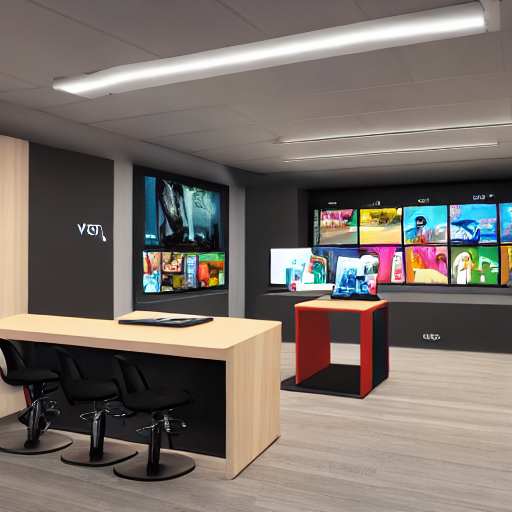

In [8]:
image = pipe(prompt="apple studio", num_inference_steps = 100, guidance_scale = 7.5).images[0]
image

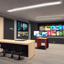

In [10]:
image = image.resize((64,64))
image

In [ ]:
for i in range(50):
    image = pipe(prompt="good C0201", num_inference_steps = 50, guidance_scale = 7.5).images[0]
    image = image.resize((78, 108))
    image.save(f"image/good_C0201_{i}.png")

In [2]:
from diffusers import StableDiffusionPipeline
import torch
from PIL import Image
model_path = "/root/notebooks/nfs/work/barry.chen/diffusers/examples/text_to_image/model/F1210_L2016_emb"
pipe = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16)

pipe.to("cuda")
pipe.safety_checker = lambda images, clip_input: (images, False)

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


  0%|          | 0/50 [00:00<?, ?it/s]

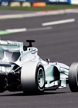

In [3]:
image = pipe(prompt="F1210", num_inference_steps = 50, guidance_scale = 7.5).images[0]
image = image.resize((78, 108))
image

  0%|          | 0/50 [00:00<?, ?it/s]

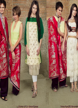

In [4]:
image = pipe(prompt="L2016", num_inference_steps = 50, guidance_scale = 7.5).images[0]
image = image.resize((78, 108))
image

  0%|          | 0/50 [00:00<?, ?it/s]

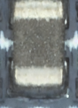

In [53]:
image = pipe(prompt="L2016", num_inference_steps = 50, guidance_scale = 7.5).images[0]
image = image.resize((78, 108))
image

In [5]:
from diffusers import StableDiffusionPipeline
import torch
from PIL import Image
model_path = "/root/notebooks/nfs/work/barry.chen/diffusers/examples/textual_inversion/model/F1210_L2016_shift"
pipe = StableDiffusionPipeline.from_pretrained(model_path, torch_dtype=torch.float16)

pipe.to("cuda")
pipe.safety_checker = lambda images, clip_input: (images, False)

  0%|          | 0/50 [00:00<?, ?it/s]

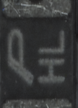

In [7]:
image = pipe(prompt="cat", num_inference_steps = 50, guidance_scale = 7.5).images[0]
image = image.resize((78, 108))
image

  0%|          | 0/50 [00:00<?, ?it/s]

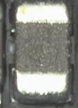

In [6]:
image = pipe(prompt="L2016", num_inference_steps = 50, guidance_scale = 7.5).images[0]
image = image.resize((78, 108))
image

In [12]:
from diffusers import StableDiffusionPipeline
import torch
from PIL import Image
model_path = "/root/notebooks/nfs/work/barry.chen/diffusers/examples/text_to_image/model/C0201_good_10000_model"
pipe = StableDiffusionPipeline.from_pretrained(model_path, torch_dtype=torch.float16)

LoRA_path="/root/notebooks/nfs/work/barry.chen/diffusers/examples/text_to_image/model/finetune"
pipe.unet.load_attn_procs(LoRA_path)

pipe.to("cuda")
pipe.safety_checker = lambda images, clip_input: (images, False)

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


  0%|          | 0/50 [00:00<?, ?it/s]

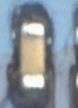

In [20]:
image = pipe(prompt="CO201", num_inference_steps = 50, guidance_scale = 7.5, cross_attention_kwargs={"scale": 0}).images[0]
image = image.resize((78, 108))
image

  0%|          | 0/50 [00:00<?, ?it/s]

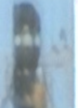

In [21]:
image = pipe(prompt="broke C0201", num_inference_steps = 50, guidance_scale = 7.5, cross_attention_kwargs={"scale": 0.8}).images[0]
image = image.resize((78, 108))
image

In [14]:
x = torch.randint(0, 10, size= (1, 77))

torch.Size([1, 77])

In [47]:
import torch
emb = torch.nn.Embedding(77, 768)

In [49]:
ans = emb(x)
ans

tensor([[[ 0.3761, -0.8804,  0.3220,  ...,  0.0199,  0.1060, -0.1159],
         [ 0.8391, -0.0923,  1.1179,  ...,  1.2136,  0.2897,  1.8751],
         [-0.1329,  1.0562,  1.0056,  ...,  0.3956, -0.8499, -0.5609],
         ...,
         [-0.2438, -0.9317, -0.1543,  ..., -0.2196, -2.1754, -0.9093],
         [-0.2438, -0.9317, -0.1543,  ..., -0.2196, -2.1754, -0.9093],
         [ 0.8391, -0.0923,  1.1179,  ...,  1.2136,  0.2897,  1.8751]]],
       grad_fn=<EmbeddingBackward0>)

In [35]:
class_names = ["c0201", "r0201", "l2016"]
class_label = text
num_classes = len(class_names)
class_vector = torch.zeros(num_classes, dtype=torch.int)
class_index = class_names.index(class_label)
class_vector[class_index] = 1
class_tensor = class_vector.view(1, num_classes)
class_tensor

tensor([[1, 0, 0]], dtype=torch.int32)

In [53]:
def class_tokenizer(text):
    class_names = [["C0201"], ["R0201"], ["L2016"], ["F1210"]]
    class_label = text 
    num_classes = len(class_names)
    class_vector = torch.zeros(num_classes, dtype=torch.int)
    class_index = class_names.index(class_label)
    class_vector[class_index] = 1
    class_tensor = class_vector.view(1, num_classes)
    return class_tensor.to("cuda")

In [77]:
import torch
from diffusers import AutoencoderKL, UNet2DConditionModel, DDPMScheduler
from transformers import CLIPTextModel, CLIPTokenizer
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader

# 加载autoencoder
vae = AutoencoderKL.from_pretrained("runwayml/stable-diffusion-v1-5", subfolder="vae", torch_dtype=torch.float16).to("cuda")

# 加载text encoder
# text_encoder = torch.nn.Embedding(77, 768)
# text_tokenizer = class_tokenizer

text_encoder = CLIPTextModel.from_pretrained("runwayml/stable-diffusion-v1-5", subfolder="text_encoder")
text_tokenizer = CLIPTokenizer.from_pretrained("runwayml/stable-diffusion-v1-5", subfolder="tokenizer")


# 初始化UNet
unet = UNet2DConditionModel.from_pretrained("runwayml/stable-diffusion-v1-5", subfolder="unet",torch_dtype=torch.float16).to("cuda") # model_config为模型参数配置
# 定义scheduler
noise_scheduler = DDPMScheduler(
    beta_start=0.00085, beta_end=0.012, beta_schedule="scaled_linear", num_train_timesteps=1000
)

# 冻结vae和text_encoder
vae.requires_grad_(False)
text_encoder.requires_grad_(False)

opt = torch.optim.AdamW(unet.parameters(), lr=1e-4)
text = "C0201"

# 将image转到latent空间
latents = torch.randn(1, 4, 32, 32).to("cuda").half()

# 提取text embeddings
# text_input_ids = text_tokenizer(text)
# text_embeddings = text_encoder(text_input_ids.to("cuda"))[0].half()

text_input_ids = text_tokenizer(
            text,
            padding="max_length",
            truncation=True,
            return_tensors="pt")
text_embeddings = text_encoder(text_input_ids.input_ids)[0]

In [128]:
u = UNet2DConditionModel(64, 4, 4, flip_sin_to_cos=True, num_class_embeds=4,cross_attention_dim=768, low_cpu_mem_usage=False, device_map=None, class_embed_type="timestep")

TypeError: __init__() got an unexpected keyword argument 'low_cpu_mem_usage'

AttributeError: 'UNet2DConditionModel' object has no attribute 'sys'

In [196]:
text_embeddings.shape

torch.Size([1, 77, 768])

In [ ]:
noise = torch.randn_like(latents)
bsz = latents.shape[0]
# 随机采样timestep
timesteps = torch.randint(0, noise_scheduler.num_train_timesteps, (bsz,), device=latents.device)
timesteps = timesteps.long()

# 将noise添加到latent上，即扩散过程
noisy_latents = noise_scheduler.add_noise(latents, noise, timesteps)

# 预测noise并计算loss
model_pred = unet(noisy_latents, timesteps, encoder_hidden_states=text_embeddings).sample
loss = F.mse_loss(model_pred.float(), noise.float(), reduction="mean")

In [177]:
def class_tokenizer(text):
    class_names = ["C0201", "R0201", "L2016", "F1210"]
    class_label = text 
    num_classes = len(class_names)
    class_vector = torch.zeros(num_classes, dtype=torch.int)
    class_index = class_names.index(class_label)
    class_vector[class_index] = 1
    class_tensor = class_vector.view(1, num_classes)
    return class_tensor

In [188]:
import torch
from diffusers import AutoencoderKL, UNet2DConditionModel, DDPMScheduler
from transformers import CLIPTextModel, CLIPTokenizer
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader

# 加载autoencoder
vae = AutoencoderKL.from_pretrained("runwayml/stable-diffusion-v1-5", subfolder="vae", torch_dtype=torch.float16)

# 加载text encoder
text_encoder = torch.nn.Embedding(77, 768)
# text_tokenizer = class_tokenizer

# text_encoder = CLIPTextModel.from_pretrained("runwayml/stable-diffusion-v1-5", subfolder="text_encoder")
text_tokenizer = class_tokenizer


# 初始化UNet
unet = UNet2DConditionModel.from_pretrained("runwayml/stable-diffusion-v1-5", subfolder="unet",torch_dtype=torch.float16) # model_config为模型参数配置
# 定义scheduler
noise_scheduler = DDPMScheduler(
    beta_start=0.00085, beta_end=0.012, beta_schedule="scaled_linear", num_train_timesteps=1000
)

# 冻结vae和text_encoder
vae.requires_grad_(False)
text_encoder.requires_grad_(False)

opt = torch.optim.AdamW(unet.parameters(), lr=1e-4)
text = "C0201"

# 将image转到latent空间
latents = torch.randn(1, 4, 32, 32)

# 提取text embeddings
# text_input_ids = text_tokenizer(text)
# text_embeddings = text_encoder(text_input_ids.to("cuda"))[0].half()

text_input_ids = text_tokenizer(text)
text_embedding = text_encoder(text_input_ids)

In [200]:
text_embedding.shape

torch.Size([1, 4, 768])

In [198]:
noise = torch.randn_like(latents)
bsz = latents.shape[0]
# 随机采样timestep
timesteps = torch.randint(0, noise_scheduler.num_train_timesteps, (bsz,), device=latents.device)
timesteps = timesteps.long()

# 将noise添加到latent上，即扩散过程
noisy_latents = noise_scheduler.add_noise(latents, noise, timesteps)

# 预测noise并计算loss
model_pred = unet(noisy_latents, timesteps, encoder_hidden_states=text_embeddings).sample
loss = F.mse_loss(model_pred.float(), noise.float(), reduction="mean")

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cpu and cuda:0! (when checking argument for argument mat2 in method wrapper_mm)

tensor([[0, 0, 1, 0]], dtype=torch.int32)